In [1]:
%matplotlib inline
from __future__ import division  # just in case you are still using python2
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('colorblind'); sns.set_color_codes()

/Users/Peter/anaconda/envs/pymc/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Code 10.1

In [2]:
d = pd.read_csv('./Data/chimpanzees.csv', sep=";")

#### Code 10.2

In [3]:
with pm.Model() as model_10_1:
    a = pm.Normal('alpha', 0, 10)
    p = pm.math.invlogit(a)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  5%|▌         | 10999/200000 [00:01<00:23, 8018.97it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -358.53

100%|██████████| 2000/2000 [00:01<00:00, 1064.99it/s]


In [5]:
pm.df_summary(trace_10_1, alpha=0.11)

,mean,sd,mc_error,hpd_5.5,hpd_94.5
alpha,0.320804,0.088398,0.003029,0.179077,0.452257


#### Code 10.3

In [6]:
expit([0.18, 0.46])

array([ 0.54487889,  0.61301418])

#### Code 10.4

In [58]:
with pm.Model() as model_10_2:
    a = pm.Normal('alpha', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    p = pm.math.invlogit(a + bp*d['prosoc_left'])
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_2 = pm.sample(2000)

with pm.Model() as model_10_3:
    a = pm.Normal('alpha', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.math.invlogit(a + (bp + bpC*d['condition'])*d['prosoc_left'] )
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_3 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  9%|▉         | 18223/200000 [00:03<00:31, 5840.99it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -358.27

100%|██████████| 2000/2000 [00:03<00:00, 657.85it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
 10%|▉         | 19923/200000 [00:03<00:32, 5501.54it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -362.77

100%|██████████| 2000/2000 [00:04<00:00, 425.79it/s]


#### Code 10.5

In [13]:
comp_df = pm.compare(traces=[trace_10_1, trace_10_2, trace_10_3], models=[model_10_1, model_10_2, model_10_3])
comp_df

,WAIC,pWAIC,dWAIC,weight,SE,dSE,warning
1,680.495,1.99885,0,0.674044,9.34298,0,0
2,682.055,2.85738,1.55983,0.309012,9.40691,0.0286595,0
0,687.862,0.960751,7.3667,0.0169446,7.12429,1.72685,0


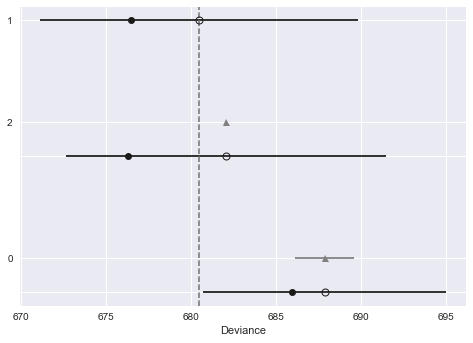

In [14]:
pm.compare_plot(comp_df);

#### Code 10.6

In [16]:
pm.df_summary(trace_10_3).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.05,0.12,0.00,-0.18,0.31
bp,0.61,0.22,0.01,0.18,1.04
bpC,-0.10,0.26,0.01,-0.65,0.38


#### Code 10.7

In [18]:
np.exp(0.61)

1.8404313987816374

#### Code 10.8

In [22]:
expit(4)

0.98201379003790845

#### Code 10.9

In [23]:
expit(4 + 0.61)

0.99014624447676869

#### Code 10.10

In [25]:
d_pred = pd.DataFrame({'prosoc_left' : [0, 1, 0, 1], 'condition' : [0, 0, 1, 1]})

# MODEL ENSEMBLE

#### Code 10.11

In [26]:
# PLOTTING

#### Code 10.12 & 10.13
This is the same as 10.6, but in the book using MCMC rather than quadratic approximation.

#### Code 10.14

In [34]:
# indices are 0 indexed
d['actor_0'] = d['actor'] - 1

with pm.Model() as model_10_4:
    a = pm.Normal('alpha', 0, 10, shape=len(d['actor'].unique()))
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.math.invlogit(a[d['actor_0'].values] + (bp + bpC*d['condition'])*d['prosoc_left'] )
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_4 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -311.09:  14%|█▎        | 27187/200000 [00:06<00:40, 4216.69it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -290.02

100%|██████████| 2000/2000 [00:07<00:00, 254.26it/s]


#### Code 10.15

In [40]:
# This is just a mapping from 1-index to 0-index vals
dict(zip(d['actor'].unique(), d['actor_0'].unique()))

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6}

#### Code 10.16

In [41]:
pm.df_summary(trace_10_4, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5
alpha__0,-0.75,0.28,0.01,-1.20,-0.33
alpha__1,10.93,5.30,0.24,3.43,18.09
alpha__2,-1.05,0.28,0.01,-1.50,-0.60
alpha__3,-1.05,0.28,0.01,-1.48,-0.57
alpha__4,-0.75,0.27,0.01,-1.21,-0.37
alpha__5,0.21,0.27,0.01,-0.20,0.65
alpha__6,1.81,0.40,0.01,1.16,2.44
bp,0.84,0.26,0.01,0.44,1.26
bpC,-0.15,0.30,0.01,-0.63,0.34


#### Code 10.7

In [44]:
post = pm.trace_to_dataframe(trace_10_4)
post.head()

,alpha__0,alpha__1,alpha__2,alpha__3,alpha__4,alpha__5,alpha__6,bp,bpC
0,-0.514489,5.485634,-0.898054,-1.120923,-0.347693,0.155597,1.793375,0.936478,0.017199
1,-0.514489,5.485634,-0.898054,-1.120923,-0.347693,0.155597,1.793375,0.936478,0.017199
2,-0.543248,6.473071,-1.106648,-0.753573,-0.551040,0.148598,1.132624,0.497473,-0.215090
3,-0.036090,5.600256,-0.983804,-1.078333,-1.020332,-0.131862,1.986372,0.798460,0.224400
4,-1.088827,4.821232,-1.370783,-1.074082,-0.723607,0.177584,1.979010,0.663319,-0.186658


#### Code 10.18

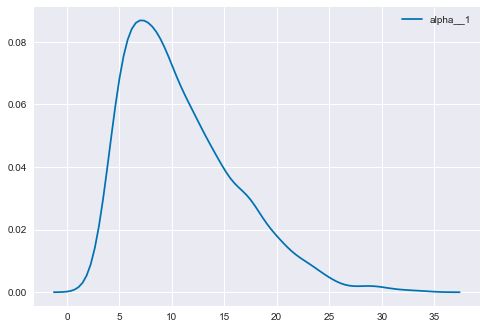

In [46]:
sns.kdeplot(post['alpha__1'])

#### Code 10.19

In [47]:
# Posterior Prediction Plots

#### Code 10.20

In [53]:
d_aggregated = d.groupby(['actor', 'condition', 'prosoc_left',  ])['pulled_left'].sum().reset_index()

#### Code 10.21

In [55]:
# indices are 0 indexed
d['actor_0'] = d['actor'] - 1

with pm.Model() as model_10_5:
    a = pm.Normal('alpha', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.math.invlogit(a + (bp + bpC*d_aggregated['condition'])*d_aggregated['prosoc_left'] )
    pulled_left = pm.Binomial('pulled_left', 18, p, observed=d_aggregated['pulled_left'])

    trace_10_5 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -152.68:  14%|█▍        | 27527/200000 [00:02<00:16, 10712.62it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -141.42

100%|██████████| 2000/2000 [00:03<00:00, 579.01it/s]


In [56]:
pm.df_summary(trace_10_5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.048120,0.125227,0.003422,-0.184947,0.305852
bp,0.608886,0.227793,0.007022,0.188566,1.084097
bpC,-0.099458,0.258715,0.006536,-0.590798,0.402101


In [66]:
# hacky check of similarity to 10_3, within a hundreth
np.isclose(pm.df_summary(trace_10_5), pm.df_summary(trace_10_3), atol=0.01)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True, False, False],
       [ True,  True,  True, False,  True]], dtype=bool)

#### Code 10.22

In [111]:
d = pd.read_csv('./Data/UCBadmit.csv', sep=';')
d

,dept,applicant.gender,admit,reject,applications
1,A,male,512,313,825
2,A,female,89,19,108
3,B,male,353,207,560
4,B,female,17,8,25
5,C,male,120,205,325
6,C,female,202,391,593
7,D,male,138,279,417
8,D,female,131,244,375
9,E,male,53,138,191
10,E,female,94,299,393


#### Code 10.23

In [112]:
d['male'] = (d['applicant.gender'] == 'male').astype(int)

with pm.Model() as model_10_6:
    a = pm.Normal('a', 0, 10)
    bm = pm.Normal('bm', 0, 10)
    p = pm.math.invlogit(a + bm*d['male'])
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_6 = pm.sample(2000)
    
with pm.Model() as model_10_7:
    a = pm.Normal('a', 0, 10)
    p = pm.math.invlogit(a)
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_7 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -567.19:  11%|█▏        | 22858/200000 [00:02<00:19, 8868.68it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -471.22

100%|██████████| 2000/2000 [00:01<00:00, 1141.61it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  9%|▉         | 18605/200000 [00:01<00:13, 13384.42it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -550.88

100%|██████████| 2000/2000 [00:01<00:00, 1817.33it/s]


#### Code 10.24

In [113]:
# Something goofy here... 
# not even close to WAIC values, larger standard error

comp_df = pm.compare(traces=[trace_10_6, trace_10_7], models=[model_10_6, model_10_7])
comp_df

,WAIC,pWAIC,dWAIC,weight,SE,dSE,warning
0,999.389,116.887,0,1,313.577,0,1
1,1050.2,85.9792,50.8065,9.27939e-12,315.252,6960.89,1


#### Code 10.25

In [114]:
pm.df_summary(trace_10_6)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,-0.829425,0.050692,0.002178,-0.926685,-0.727450
bm,0.608281,0.064709,0.002673,0.491683,0.745926


#### Code 10.26

In [115]:
post = pm.trace_to_dataframe(trace_10_6)
p_admit_male = expit(post['a'] + post['bm'])
p_admit_female = expit(post['a'])
diff_admit = p_admit_male - p_admit_female
diff_admit.describe(percentiles=[.025, .5, .975])

count    2000.000000
mean        0.141086
std         0.014589
min         0.088012
2.5%        0.112336
50%         0.140841
97.5%       0.170341
max         0.189403
dtype: float64

#### Code 10.27

In [116]:
# Posterior Predictive Check Plotting

#### Code 10.28

In [117]:
depts = d['dept'].unique()
dept_index = dict(zip(depts, range(len(depts))))
d['dept_id'] = d['dept'].map(dept_index)
for dept in dept_index:
    print(dept, dept_index[dept])

A 0
B 1
C 2
D 3
E 4
F 5


⚠️ Note when doing this index mapping, you need to append `.values` to the indexed values in the model, otherwise you'll get:

```
TypeError: invalid type comparison```

In [118]:
with pm.Model() as model_10_8:
    a = pm.Normal('a', 0, 10, shape=len(depts))
    p = pm.math.invlogit(a[d['dept_id'].values])
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_8 = pm.sample(2000)

with pm.Model() as model_10_9:
    a = pm.Normal('a', 0, 10, shape=len(depts))
    bm = pm.Normal('bm', 0, 10)
    p = pm.math.invlogit(a[d['dept_id'].values] + bm*d['male'])
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_9 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -73.901: 100%|██████████| 200000/200000 [00:19<00:00, 10273.17it/s]
Finished [100%]: Average ELBO = -73.89
100%|██████████| 2000/2000 [00:02<00:00, 809.76it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -78.587: 100%|██████████| 200000/200000 [00:25<00:00, 7806.55it/s]
Finished [100%]: Average ELBO = -78.583
100%|██████████| 2000/2000 [00:02<00:00, 803.24it/s]


#### Code 10.29

In [120]:
# WAIC values still off
# Plus warning flag

comp_df = pm.compare(traces=[trace_10_6, trace_10_7, trace_10_8, trace_10_9], models=[model_10_6, model_10_7, model_10_8, model_10_9])
comp_df

,WAIC,pWAIC,dWAIC,weight,SE,dSE,warning
2,104.623,6.29143,0,0.895297,16.9033,0,1
3,108.915,9.6184,4.29206,0.104703,15.7389,3.35732,1
0,999.389,116.887,894.766,4.52953e-195,313.577,27831.2,1
1,1050.2,85.9792,945.572,4.20313e-206,315.252,28255,1


#### Code 10.30

In [121]:
pm.df_summary(trace_10_9).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a__0,0.68,0.10,0.0,0.49,0.87
a__1,0.64,0.12,0.0,0.40,0.85
a__2,-0.58,0.08,0.0,-0.74,-0.43
a__3,-0.62,0.09,0.0,-0.78,-0.45
a__4,-1.06,0.10,0.0,-1.26,-0.87
a__5,-2.63,0.16,0.0,-2.96,-2.35
bm,-0.10,0.08,0.0,-0.26,0.06


#### Code 10.31
Replicated model above but with MCMC in book.